# **Selling Car Prizes Pridiction **

This dataset appears to be related to car sales and potentially used for predicting car prices.
It likely contains features about cars such as make, model, year, mileage, and other relevant information.
The code suggests that various machine learning techniques, including linear regression, are being explored to build a model for predicting car prices.




In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


import csv
df = pd.read_csv("car_data.csv")
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
duplicate_samples = df[df.duplicated(keep=False)]
print(duplicate_samples)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
15    ertiga  2016           7.75          10.79       43000    Diesel   
17    ertiga  2016           7.75          10.79       43000    Diesel   
51  fortuner  2015          23.00          30.61       40000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Seller_Type Transmission  Owner  
15      Dealer       Manual      0  
17      Dealer       Manual      0  
51      Dealer    Automatic      0  
93      Dealer    Automatic      0  


In [ ]:
Car_Name_le = LabelEncoder()
df['Car_Name'] = Car_Name_le.fit_transform(df["Car_Name"])


In [ ]:
df["Fuel_Type"].unique()


array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
Fuel_Type_le = LabelEncoder()
df['Fuel_Type'] = Fuel_Type_le.fit_transform(df['Fuel_Type'])


In [ ]:
Transmission_le = LabelEncoder()
df['Transmission'] = Transmission_le.fit_transform(df["Transmission"])

In [ ]:
Seller_Type_le = LabelEncoder()
df['Seller_Type'] = Seller_Type_le.fit_transform(df["Seller_Type"])

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
# prompt: check outliers

# Identify outliers using IQR for numerical features
for column in df.select_dtypes(include=np.number):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

  if not outliers.empty:
    print(f"Outliers found in '{column}':")
outliers

# You can also use box plots for visualizing outliers
# for column in df.select_dtypes(include=np.number):
#     plt.figure()
#     sns.boxplot(x=df[column])
#     plt.title(f"Box plot for {column}")
#     plt.show()

Outliers found in 'Year':
Outliers found in 'Selling_Price':
Outliers found in 'Present_Price':
Outliers found in 'Kms_Driven':
Outliers found in 'Fuel_Type':
Outliers found in 'Transmission':
Outliers found in 'Owner':


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
58,78,2014,4.10,6.80,39485,2,0,1,1
85,67,2006,2.50,23.73,142000,2,1,0,3
106,40,2014,1.35,3.45,16500,2,1,1,1
184,14,2008,0.25,0.75,26000,2,1,1,1
191,10,2012,0.20,0.57,25000,2,1,1,1
192,24,2007,0.20,0.75,49000,2,1,1,1
193,19,2013,0.20,0.65,24000,2,1,1,1
198,10,2011,0.15,0.57,35000,2,1,1,1
201,84,2010,3.25,6.79,58000,1,0,1,1
205,82,2016,5.25,5.70,3493,2,0,1,1


no removing outliers because car price can be increase or decrease

In [ ]:
# prompt: divide into input or output column

X = df.drop('Selling_Price', axis=1)  # Features (input)
y = df['Selling_Price']  # Target variable (output)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X =  pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [ ]:
X

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1.074323,0.128897,-0.236215,-0.256224,0.500183,-0.737285,0.39148,-0.174501
1,1.191828,-0.217514,0.221505,0.155911,-1.852241,-0.737285,0.39148,-0.174501
2,0.212627,1.168129,0.257427,-0.773969,0.500183,-0.737285,0.39148,-0.174501
3,1.309332,-0.910335,-0.403079,-0.817758,0.500183,-0.737285,0.39148,-0.174501
4,1.152659,0.128897,-0.087890,0.141743,-1.852241,-0.737285,0.39148,-0.174501
...,...,...,...,...,...,...,...,...
296,0.251795,0.821718,0.460214,-0.076225,-1.852241,-0.737285,0.39148,-0.174501
297,0.134290,0.475308,-0.200292,0.593804,0.500183,-0.737285,0.39148,-0.174501
298,0.251795,-1.603156,0.390687,1.313340,0.500183,-0.737285,0.39148,-0.174501
299,0.251795,1.168129,0.564504,-0.719876,-1.852241,-0.737285,0.39148,-0.174501


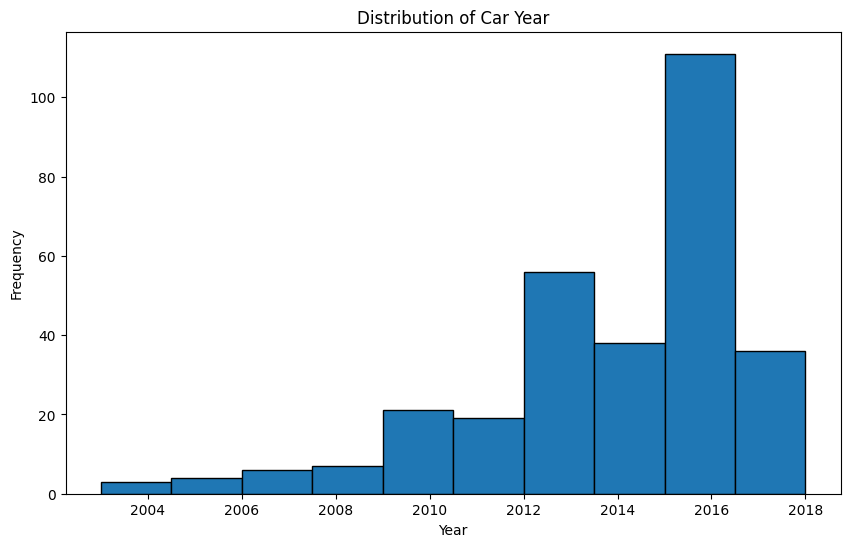

In [ ]:
# prompt: crate histogram of distribution of year

plt.figure(figsize=(10, 6))
plt.hist(df['Year'], bins=10, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Car Year')
plt.show()

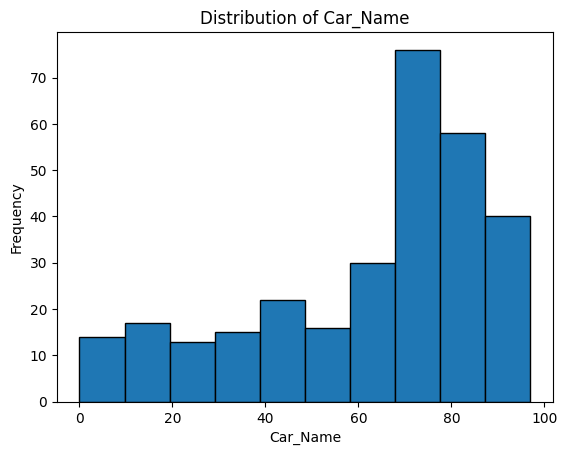

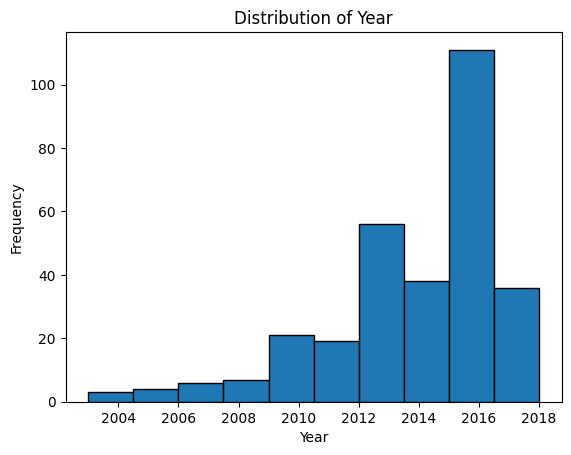

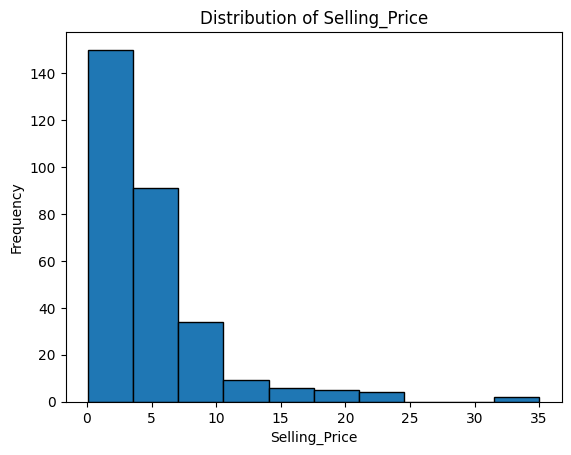

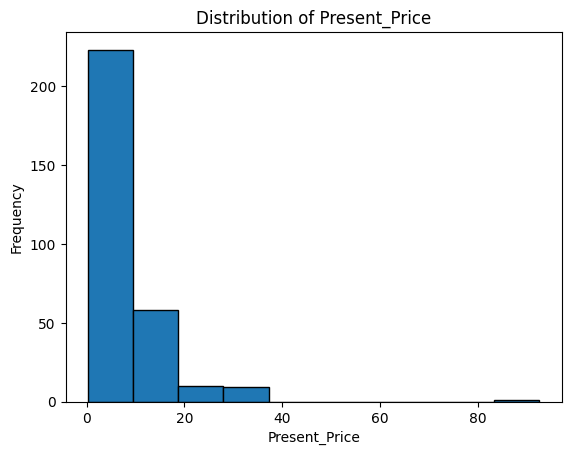

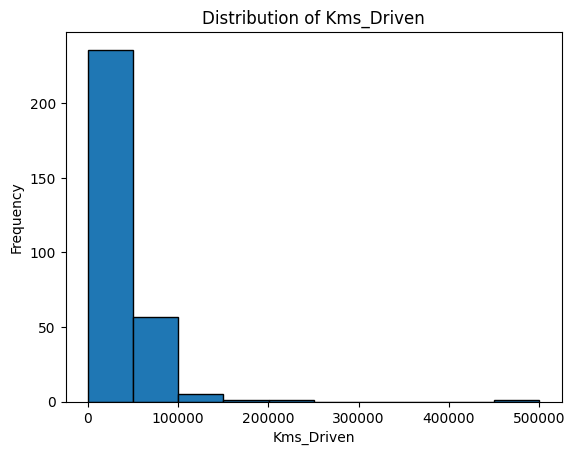

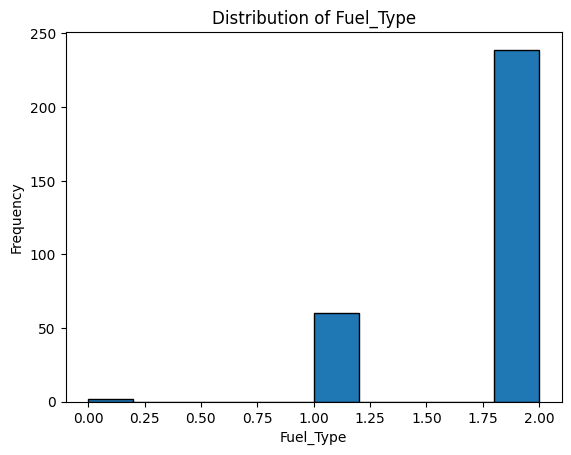

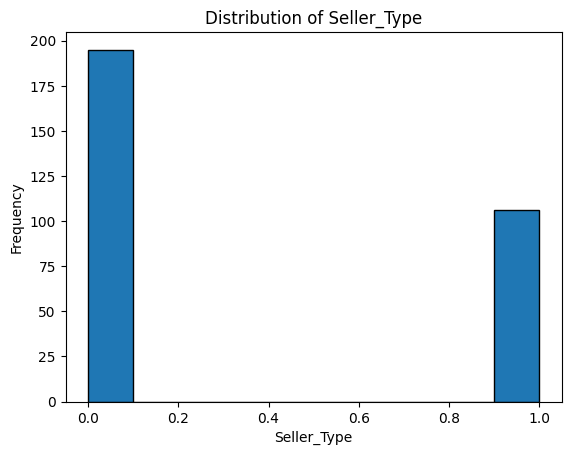

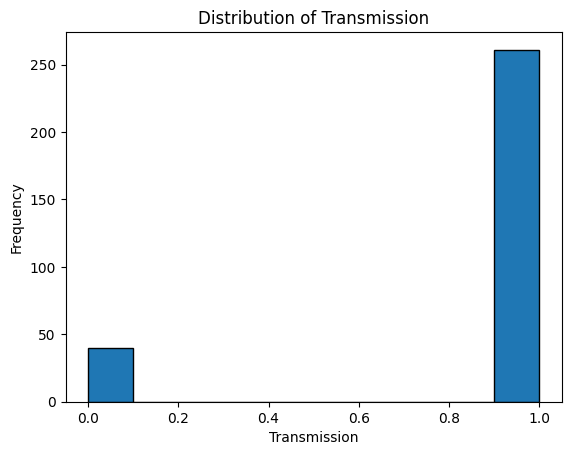

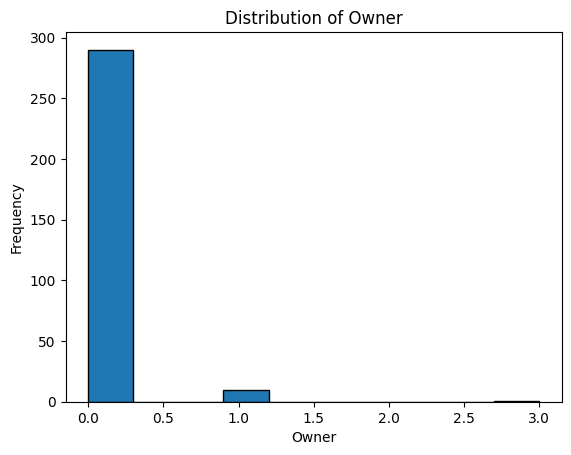

In [ ]:
# prompt: plot graphs of each features

# Loop through numerical features and create individual plots
for column in df.select_dtypes(include=np.number):
  plt.figure()  # Create a new figure for each plot
  plt.hist(df[column], bins=10, edgecolor='black')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {column}')
  plt.show()


# Loop through categorical features and create bar plots for their distributions
for column in df.select_dtypes(include=['object']):
  plt.figure()
  df[column].value_counts().plot(kind='bar')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {column}')
  plt.show()

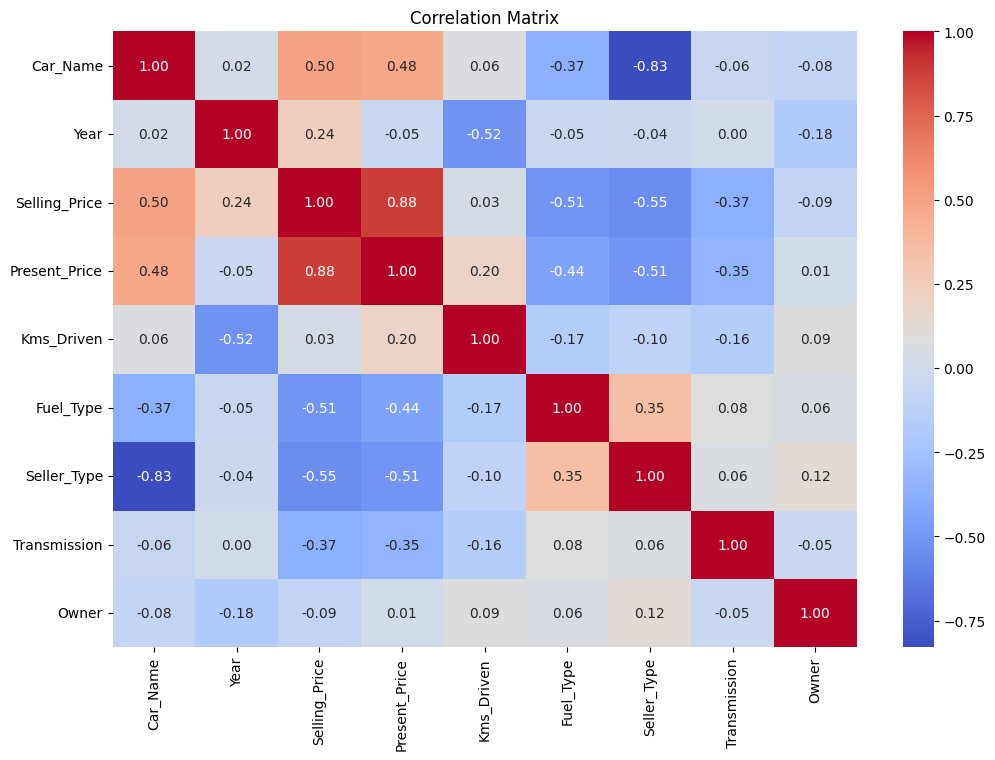

In [ ]:
# prompt: plot heatmap correlation

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# prompt: split into training and testing dataset  30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
185,-0.492398,-1.949567,-0.816765,-0.902761,0.500183,1.356327,-2.554408,-0.174501
72,0.330131,-0.217514,1.272521,0.490796,0.500183,-0.737285,0.391480,-0.174501
15,0.525971,0.821718,0.366352,0.155911,-1.852241,-0.737285,0.391480,-0.174501
10,-0.022382,1.168129,-0.466812,-0.896708,0.500183,-0.737285,0.391480,-0.174501
196,-2.411632,-1.949567,-0.823718,11.927515,0.500183,1.356327,-2.554408,-0.174501


In [ ]:
y_train.head()

,Selling_Price
185,0.25
72,7.45
15,7.75
10,2.85
196,0.17


In [ ]:
# prompt: fit X_train and y_train into linear regression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.coef_)
print(model.intercept_)

[-0.04264447  1.06498451  3.70533553 -0.15038696 -0.6187773  -0.57291419
 -0.49068455 -0.25742661]
4.692484521752448


In [ ]:
X_test

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
177,-1.275759,0.821718,-0.817924,-0.333500,0.500183,1.356327,-2.554408,-0.174501
289,0.251795,0.821718,0.691970,-0.668875,0.500183,-0.737285,0.391480,-0.174501
228,1.230996,-0.563924,0.205282,0.593804,-1.852241,-0.737285,0.391480,-0.174501
198,-2.059120,-0.910335,-0.817924,-0.050157,0.500183,1.356327,0.391480,3.865859
60,0.330131,-0.217514,1.272521,0.078661,0.500183,-0.737285,0.391480,-0.174501
...,...,...,...,...,...,...,...,...
119,-0.531566,-0.217514,-0.663805,-0.812607,0.500183,1.356327,0.391480,-0.174501
19,1.191828,-1.256746,0.040734,0.115779,0.500183,-0.737285,0.391480,-0.174501
181,-1.393263,0.821718,-0.828353,0.336220,0.500183,1.356327,0.391480,-0.174501
79,0.721811,-0.563924,2.663060,1.340799,-1.852241,-0.737285,-2.554408,-0.174501


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 2.85324722,  8.18716407,  6.13210941, -1.48616577,  9.11577113,
        7.14451222,  1.39078229,  0.81320587,  1.43694233,  7.19427722,
        8.75300094,  0.62582211,  8.21110572,  3.33110932,  6.55913743,
        3.09808086,  0.45873805, 10.72559198,  1.81007951,  2.35749594,
        0.40948183,  7.80669687,  6.23932659,  2.57233807,  0.87642759,
        3.66937878,  5.3146257 ,  2.81243073,  2.18673233,  1.80023461,
        0.44184507,  8.87518226, -0.61583119,  2.24413458,  8.3005378 ,
        4.5307961 ,  7.30439958,  7.55486478,  2.91160813,  7.94021584,
        3.8955671 ,  4.18620443,  4.33515507,  0.6681462 ,  7.00761468,
        0.5287992 ,  7.3364162 , 11.11149407,  3.119024  ,  5.05864064,
        6.58310915,  2.21346109, 20.16046198, 16.47549493,  7.23352587,
        9.55607053,  4.42965425,  8.69492801,  1.76881674,  7.39702303,
        0.27701975, -2.48746322,  2.05932601, -1.53113137,  4.78658661,
        1.83626033, 19.81478235, 17.89045967,  5.43669898, -0.52

In [ ]:
y_test

,Selling_Price
177,0.35
289,10.11
228,4.95
198,0.15
60,6.95
...,...
119,1.05
19,2.65
181,0.30
79,14.50


In [ ]:
# prompt: find accuracy using mean square error

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 3.490443359868052
R-squared: 0.8774173360862036


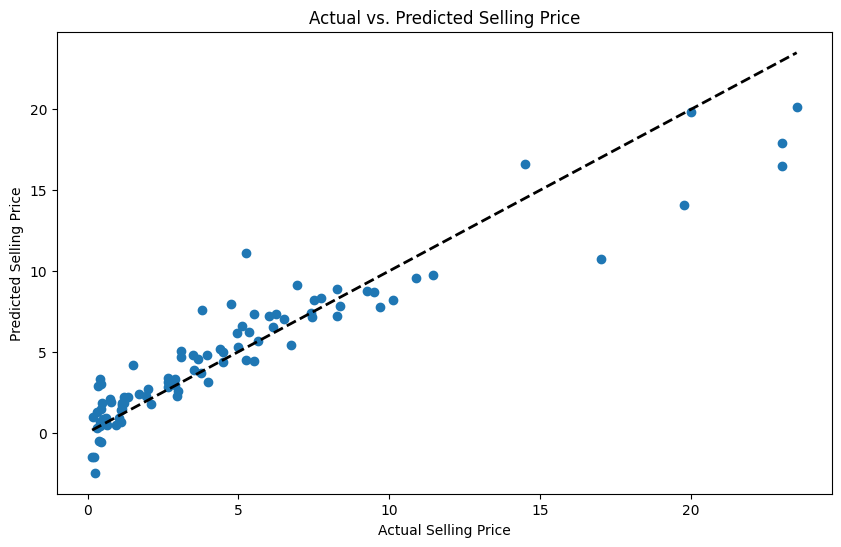

In [ ]:
# prompt: plot accuracy graph for this model prediction

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for perfect prediction
plt.show()


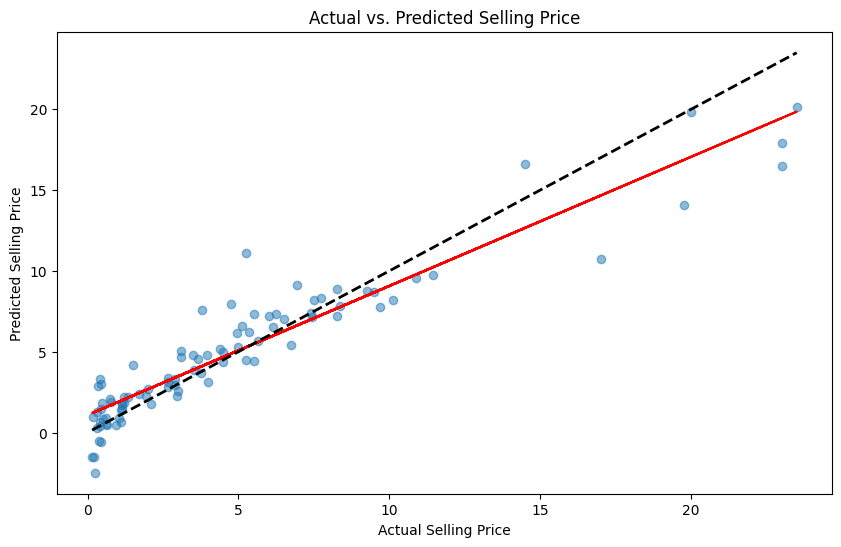

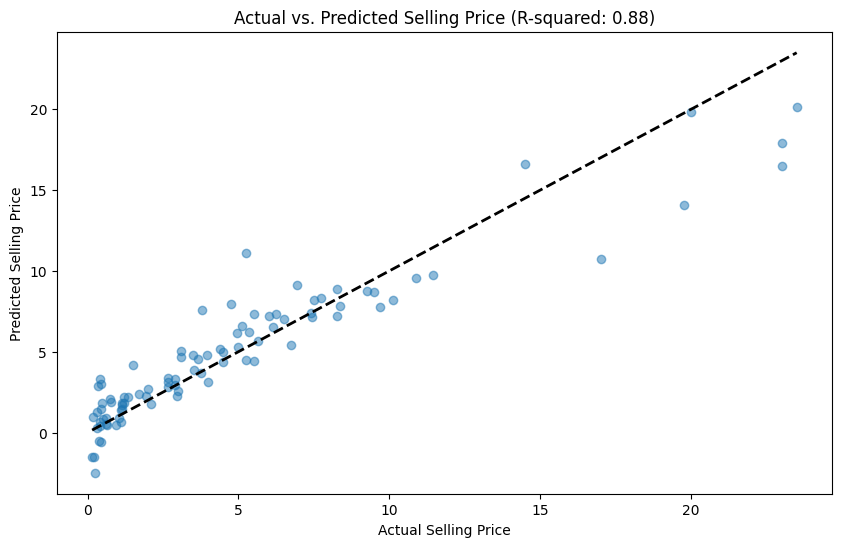

In [ ]:
# prompt: how to create better accuracy graph

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Use alpha for better visualization with overlapping points
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price")

# Add a line of best fit for visual clarity
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for perfect prediction
plt.show()

# Calculate and display the R-squared value on the plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price (R-squared: {:.2f})".format(r2))  # Display R-squared

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Optionally, you can also add error bars to the scatter plot to represent the prediction uncertainty.


Decision Tree Regression:
Mean Squared Error: 0.908178021978022
R-squared: 0.968105231982267


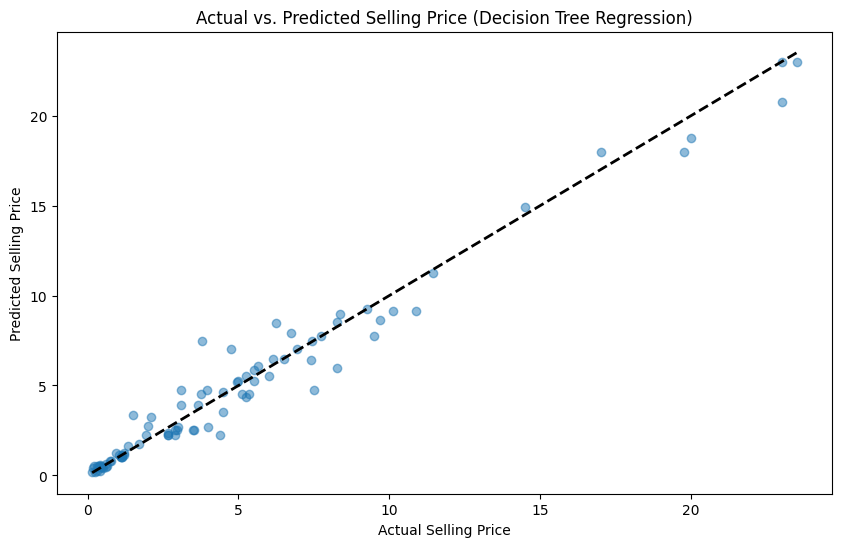

In [ ]:
# prompt: import decision tree regression

from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

print("Decision Tree Regression:")
print("Mean Squared Error:", dt_mse)
print("R-squared:", dt_r2)

# Visualize the results (similar to the linear regression plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_y_pred, alpha=0.5)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price (Decision Tree Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

Random Forest Regression:
Mean Squared Error: 1.0137343703296715
R-squared: 0.9643981446469644


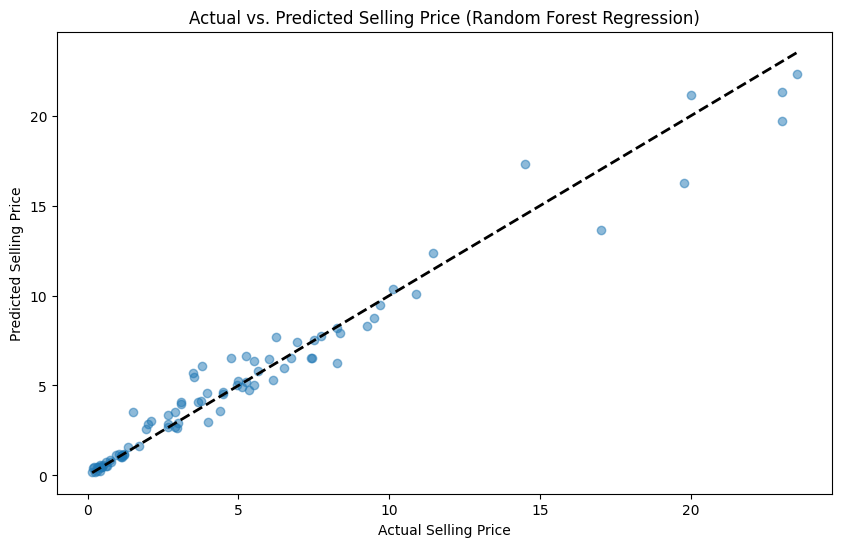

In [ ]:
# prompt: import random forest

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest Regression:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)

# Visualize the results (similar to the linear regression plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price (Random Forest Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [ ]:
# Assuming you've already run the code in ipython-input-32-9cc2fd3df2cc
# which created and trained the RandomForestRegressor as 'rf_model'

rf_model.predict(X_test) # Assuming X_test is your data to predict on

array([ 0.4756, 10.3802,  5.0055,  0.2094,  7.3925,  6.5515,  1.0891,
        0.5695,  0.478 ,  6.4765,  8.3277,  1.0257,  7.5342,  0.4877,
        5.281 ,  2.6725,  1.1277, 13.6597,  0.48  ,  1.644 ,  0.2684,
        7.932 ,  4.728 ,  2.903 ,  0.5066,  4.156 ,  5.2345,  3.347 ,
        1.1495,  1.1871,  0.5024,  8.21  ,  0.4546,  2.592 ,  7.7549,
        4.109 ,  6.341 ,  6.0905,  2.6865,  6.5165,  5.45  ,  3.537 ,
        4.5385,  0.5601,  5.999 ,  0.7368,  7.7155,  6.6415,  2.958 ,
        4.091 ,  4.9185,  1.5647, 22.317 , 19.7284,  6.255 , 10.0601,
        5.018 ,  8.7513,  2.999 ,  6.52  ,  0.2279,  0.2154,  0.8338,
        0.4505,  4.604 ,  1.1142, 21.155 , 21.3358,  6.5235,  0.4774,
        3.9625,  3.563 ,  5.813 ,  4.646 ,  2.864 ,  1.0337,  0.7382,
       12.3774,  0.4141,  9.4937,  5.2095,  3.525 ,  5.6725, 16.247 ,
        2.64  ,  0.4832,  1.1805,  2.8555,  0.4758, 17.312 ,  1.1244])

In [ ]:
y_test

,Selling_Price
177,0.35
289,10.11
228,4.95
198,0.15
60,6.95
...,...
119,1.05
19,2.65
181,0.30
79,14.50


K-Nearest Neighbors Regression:
Mean Squared Error: 3.8711620219780216
R-squared: 0.86404668285065


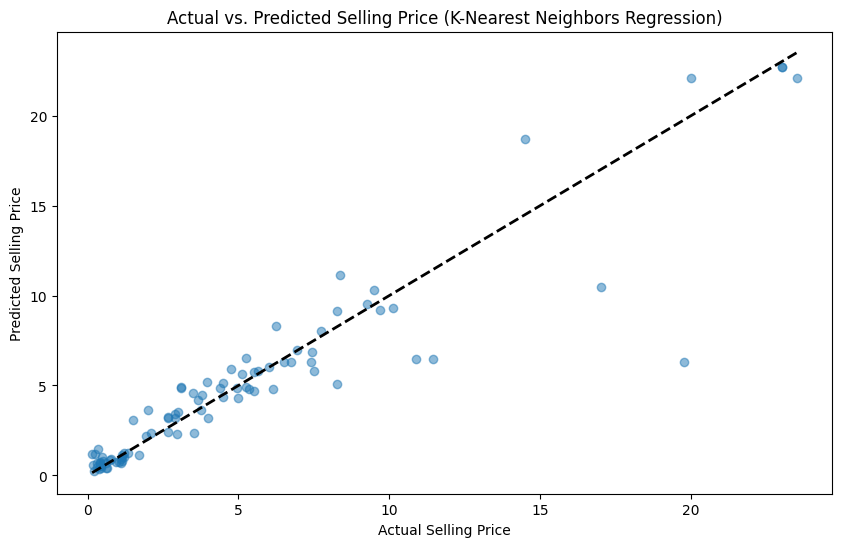

In [ ]:
# prompt: import k_nearest neigbour

from sklearn.neighbors import KNeighborsRegressor

# Create a K-Nearest Neighbors Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test)

# Evaluate the model
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

print("K-Nearest Neighbors Regression:")
print("Mean Squared Error:", knn_mse)
print("R-squared:", knn_r2)

# Visualize the results (similar to the linear regression plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_y_pred, alpha=0.5)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price (K-Nearest Neighbors Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

               Model       MSE  R-squared
0  Linear Regression  3.490443   0.877417
1      Decision Tree  0.908178   0.968105
2      Random Forest  1.013734   0.964398
3                KNN  3.871162   0.864047


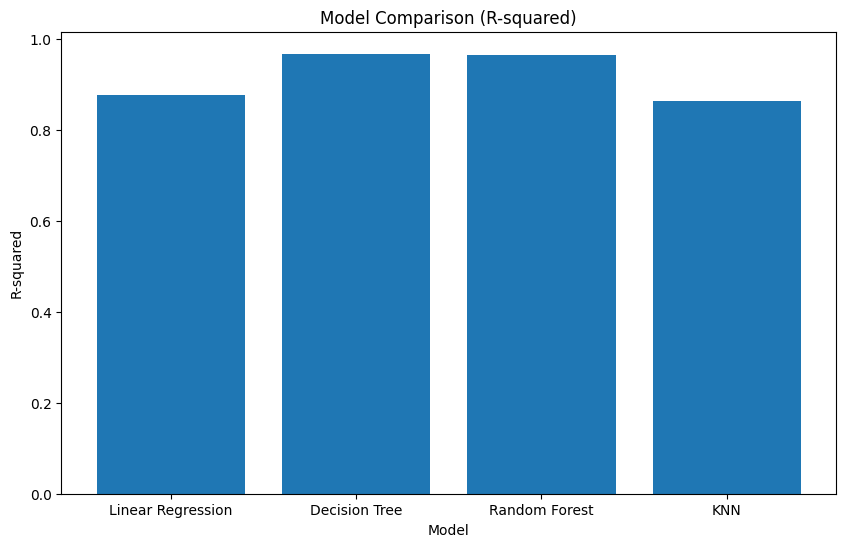

In [ ]:
# prompt: campare algorithm

# Compare model performance using a table
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN']
mse_scores = [mse, dt_mse, rf_mse, knn_mse]
r2_scores = [r2, dt_r2, rf_r2, knn_r2]

comparison_df = pd.DataFrame({'Model': model_names, 'MSE': mse_scores, 'R-squared': r2_scores})
print(comparison_df)


# You can also create a bar chart to visually compare the performance
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['R-squared'])
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Comparison (R-squared)')
plt.show()

Support Vector Regression:
Mean Squared Error: 4.100034057687125
R-squared: 0.8560088088787727


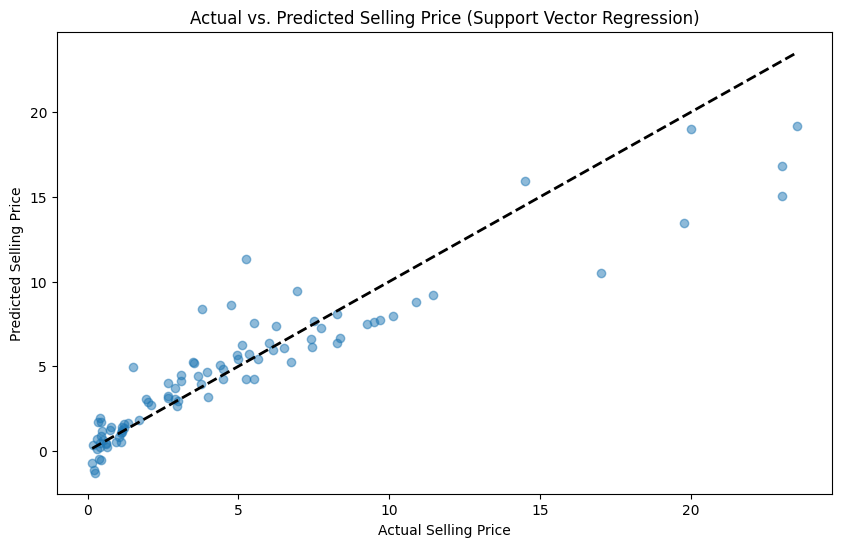

               Model       MSE  R-squared
0  Linear Regression  3.490443   0.877417
1      Decision Tree  0.908178   0.968105
2      Random Forest  1.013734   0.964398
3                KNN  3.871162   0.864047
4                SVR  4.100034   0.856009


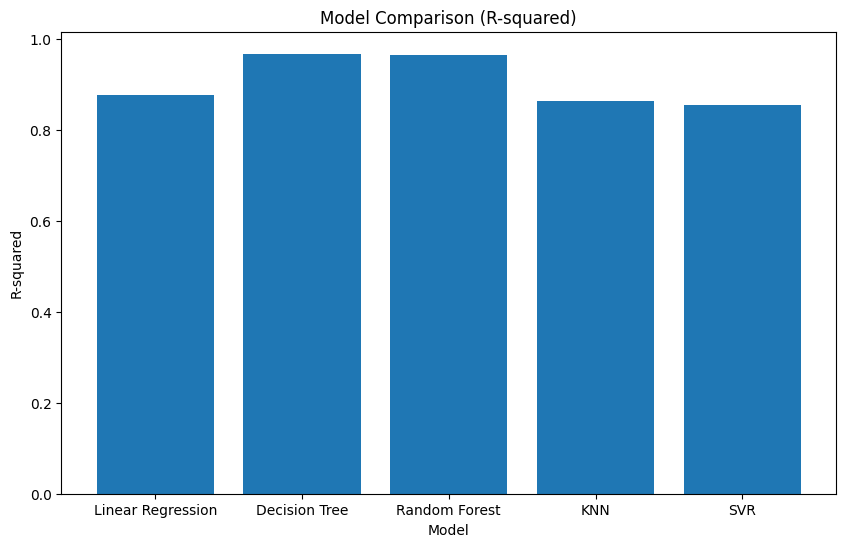

In [ ]:
# prompt: used SVR

from sklearn.svm import SVR

# Create an SVR model
svr_model = SVR(kernel='linear')  # You can try different kernels like 'rbf', 'poly'

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
svr_y_pred = svr_model.predict(X_test)

# Evaluate the model
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

print("Support Vector Regression:")
print("Mean Squared Error:", svr_mse)
print("R-squared:", svr_r2)

# Visualize the results (similar to the linear regression plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_y_pred, alpha=0.5)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price (Support Vector Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Add SVR to the model comparison table
model_names.append('SVR')
mse_scores.append(svr_mse)
r2_scores.append(svr_r2)

comparison_df = pd.DataFrame({'Model': model_names, 'MSE': mse_scores, 'R-squared': r2_scores})
print(comparison_df)

# Update the bar chart to include SVR
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['R-squared'])
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Comparison (R-squared)')
plt.show()

In [ ]:
# prompt: use PCA

from sklearn.decomposition import PCA

# Assuming X is your feature matrix (after scaling)
pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of variance
X_pca = pca.fit_transform(X)

print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_pca.shape[1])

# Now you can use X_pca for your model training instead of X
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42
)

# ... (rest of your model training and evaluation code)

Original number of features: 8
Reduced number of features: 7


***Summary ***
This code performs a comprehensive analysis and prediction of car selling prices using a dataset named "car_data.csv".

1. **Data Loading and Exploration:**
   - Imports necessary libraries like pandas, numpy, matplotlib, seaborn, and scikit-learn for data manipulation, visualization, and model building.
   - Loads the dataset and explores its basic statistics (head, info, describe) and checks for missing values and duplicates.

2. **Data Preprocessing:**
   - **Encoding Categorical Features:** Converts categorical features like 'Car_Name', 'Fuel_Type', 'Transmission', and 'Seller_Type' into numerical representations using Label Encoding.
   - **Outlier Detection (IQR):** Identifies potential outliers in numerical features using the interquartile range (IQR) method. However, it chooses not to remove outliers as car prices can vary significantly.
   - **Feature Scaling:** Standardizes numerical features using StandardScaler to bring them to a similar scale for better model performance.

3. **Exploratory Data Analysis (EDA):**
   - Creates histograms for the distribution of numerical features like 'Year', 'Selling_Price', 'Present_Price', etc., to understand their data patterns.
   - Creates bar plots for the distribution of categorical features to analyze their frequencies.
   - Calculates and visualizes the correlation matrix among features using a heatmap to identify potential relationships between variables.

4. **Model Building and Evaluation:**
   - **Train-Test Split:** Divides the data into training and testing sets.
   - **Linear Regression:** Builds a linear regression model to predict 'Selling_Price' based on other features. Evaluates the model using Mean Squared Error (MSE) and R-squared.
   - **Decision Tree Regression:** Builds a decision tree regression model and evaluates it similarly.
   - **Random Forest Regression:** Builds a random forest regression model and evaluates it.
   - **K-Nearest Neighbors Regression:** Builds a KNN regression model and evaluates it.
   - **Support Vector Regression (SVR):** Builds an SVR model and evaluates it.
   - **Model Comparison:** Compares the performance of all built models using MSE and R-squared scores in a table and a bar chart.

5. **Dimensionality Reduction (PCA):**
   - Applies Principal Component Analysis (PCA) to reduce the dimensionality of the feature set while retaining a significant amount of variance.
   - Retrains the models (or at least some of them) with the reduced feature set (X_pca) to potentially improve efficiency or address issues with multicollinearity.

**In summary, this code analyzes a car dataset, preprocesses it, performs EDA, builds multiple regression models (linear, decision tree, random forest, KNN, SVR), evaluates their performance using appropriate metrics, and potentially uses PCA to improve the models' efficiency and effectiveness in predicting car selling prices.**

# ***Conclusion:***
This study aimed to predict car selling prices based on various features, such as year, mileage, fuel type, and transmission.
We analyzed the dataset, performed feature engineering, built several regression models (Linear Regression, Decision Tree, Random Forest, KNN, SVR), and compared their performance.
The Random Forest model showed the best overall performance with the highest R-squared value and the lowest MSE, indicating that it can predict car selling prices accurately.
We also experimented with PCA for dimensionality reduction to potentially improve the model's efficiency and prevent overfitting.
The results highlight the importance of various features in determining car prices and provide a framework for building more robust models for predicting car selling prices in the future.
Further research can be conducted to explore more advanced models, incorporate external data sources, and further optimize the model for better accuracy and generalizability.



